<center><h1>CSCI 6409: Project</h1>
<h3>Stock Price Prediction using Machine Learning</h3></center>

<b>Team Members:</b><br>
1. Yogesh Kumar - B00911827
2. Tushar Arora - B00912281
3. Shobhit Arora - B00910331
4. Hargun Chhabra - B00899294
5. Anay Awasthi - B00912081

### Business Problem:   
Stock market is a viable option for investment for many people, but it requires knowledge and experience in this domain. However, new people trying to start investment with stock market have to incur loss at the beginning. With machine learning, past data can be analyzed and used to help in making decisions for investment.   
Existing solutions are built for long-term investment, but a solutions for intraday prediction are very less. Intraday trading is when you buy and sell stocks on the same day.

### Business Understanding

#### Understanding the business objectives

1. **What is the main goal of the project?**
    - The main goal is to maximize trading profits by predicting the stock price of select stocks on an intraday basis.

#### Understanding the current situation

1. What is the current **analytics capability** of most people who trade in the stock market?
    - Some traders may not be using any technical indicators and may simply rely on visual patterns present in the charts (price-action).
    - Many traders use various technical indicators that provide insights that can be used for predicting the stock price.
    <br><br>
2. **Are the traders ready** to trade stocks based on the insights that a Machine Learning solution would provide?
    - A trader who has used technical indicators would find it insightful and use the Machine Learning model as another insight into the task.
3. What are the available **resources**?
    - Historical stock prices for most stocks are available using yahoo finance. Python also has a library that fetches the stock data which can then be used by the model.
    <br><br>
4. What is the current **trading process**?
    - Traders observe a stock that they wish to buy/sell.
        - They apply one or more technical indicators like Moving Averages, Relative Strength Index, etc.
    - When the indicators give a buy signal, they buy the stock.

#### How predictive analytics could help?

Based on our understanding of the goal and how stock trading works, here is a list of ways through which predictive analytics could help maximise trading profits for stock traders:

##### **Solution 1**: Predict the stock price for long-term investment

- A model can be trained that takes in account the past data of a stock using time-series forecasting.
- Most of the existing literature focus on this aspect, forecasting over longer time periods. 

##### **Solution 2**: Predict the closing price of the stock for intraday trading

- A model can be trained that will predict the closing price of the stock using the available data.
- Since technical analysis relies on the price (open, high, low and close) and volume of the stock, it is feasible.

Since the existing solutions mainly focus on long-term investment, we have chosen the path for solution 2, intraday trading.

### Data Understanding

The values provided by the API can be divided into 3 domains:

1. Price-Related
    - **open:** The price at which the stock opened on the given day.
    - **high:** The highest price the stock had on the given day.
    - **low:** The lowest price the stock had on the given day.
2. Volume
    - **volume:** The number of shares traded on the given day.
3. Identity-Related
    - **Name:** The name of the stock.
    - **Date:** The date for which the specified stock had the following open, high, low and close values.

# Identifying Prediction Subject

For the final solution, the prediction subject would be the closing price of the given day. Below is a hierarchical graph of the domain concepts:

#### Domain concepts

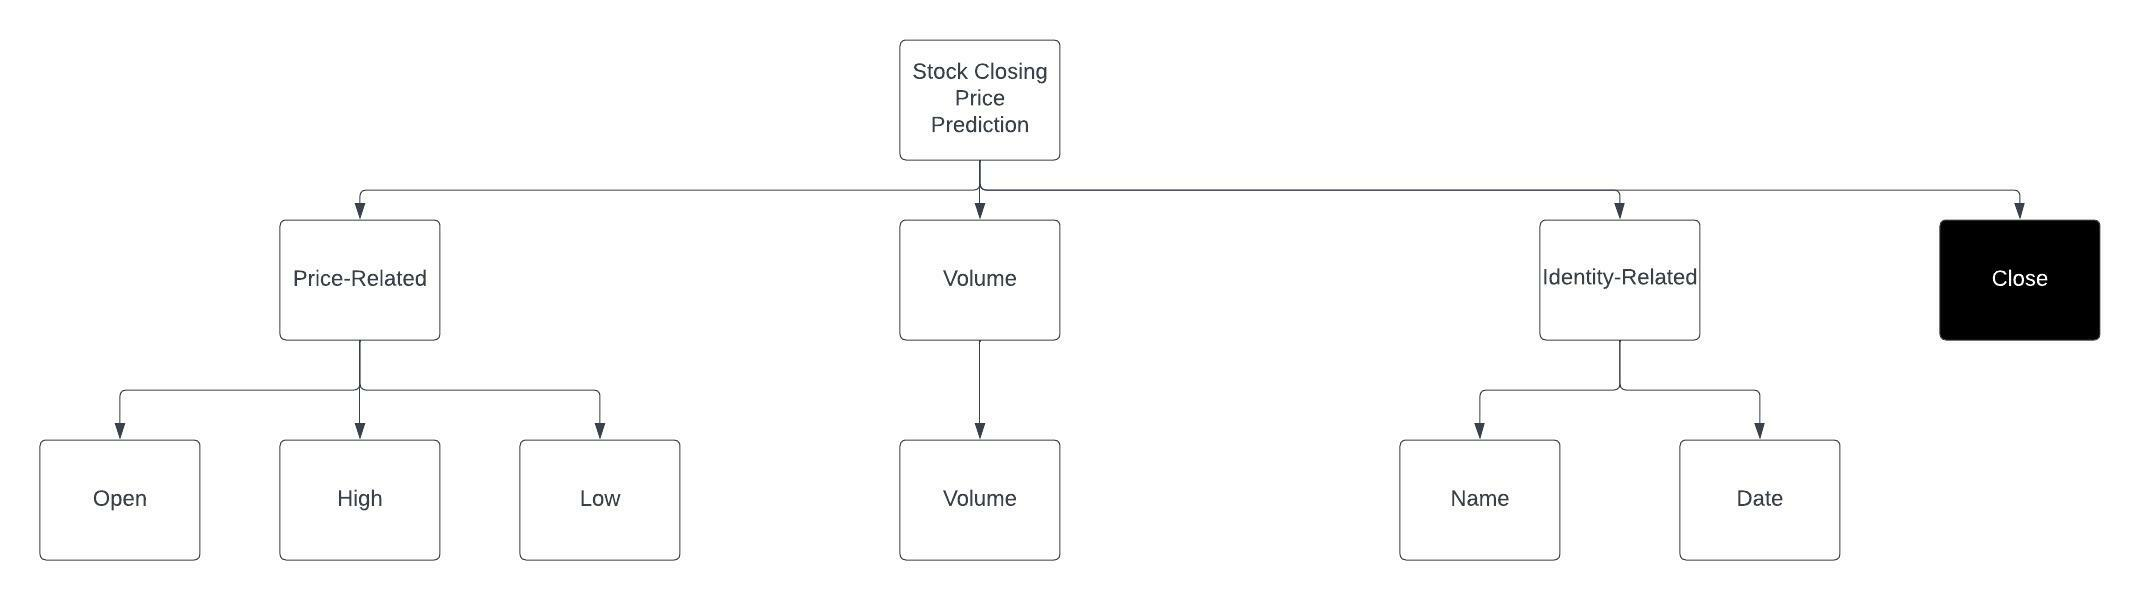

In [2]:
import numpy as np 
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from sklearn.metrics import mean_squared_error
import yfinance as yf
from datetime import datetime
import numpy as np
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure

C:\Users\tusha\AppData\Local\Temp\ipykernel_23004\327674836.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [42]:
from matplotlib import pyplot as plt
# from sklearn.linear_model import LinearClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit

from sklearn.metrics import mean_squared_error
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import tree
from numpy import mean
from numpy import std

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_validate

from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
import matplotlib.pyplot as plt

In [48]:
from sklearn.model_selection import train_test_split

import pickle
import math
import random
from sklearn import tree
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR

In [8]:
# The tech stocks we'll use for this analysis
tech_list = ['ACGL','COSM','IPDN']

# Set up End and Start times for data grab
tech_list = ['ACGL','COSM','IPDN']

end = datetime.now()
start = datetime(end.year - 10, 1, 1)


In [9]:
lis=[]
for i in range(len(tech_list)):
#     x=yf.download(tech_list[i], datetime(2007,11,10), datetime(2019,11,10))
    x=yf.download(tech_list[i], datetime(2013,11,10), datetime(2020,11,10))
    x.insert(6,"Comapny code",tech_list[i])
    lis.append(x)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
testlis=[]
for i in range(len(tech_list)):
#     x=yf.download(tech_list[i], datetime(2007,11,10), datetime(2019,11,10))
    x=yf.download(tech_list[i], datetime(2020,12,10), datetime.now())
    x.insert(6,"Comapny code",tech_list[i])
    testlis.append(x)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data is fetched from online API from 'yfinance', Yahoo Finance API.

#### Descriptive and Target Features

In [74]:
data=[["Open","The price at which the stock opened on the given day."],
      ["High","The highest price the stock had on the given day"],
     ["Low","The lowest price the stock had on the given day"],
     ["Volume","The number of shares traded on the given day"],
     ["Comapny code","Code of the company stock"],
     ["Close", "The closing price of a stock. This is the target feature."]
     ]

df = pd.DataFrame(data, columns=['Feature Name',"Description"])

In [75]:
df

,Feature Name,Description
0,Open,The price at which the stock opened on the given day.
1,High,The highest price the stock had on the given day
2,Low,The lowest price the stock had on the given day
3,Volume,The number of shares traded on the given day
4,Comapny code,Code of the company stock
5,Close,The closing price of a stock. This is the target feature.


In [11]:
lis[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2013-11-11 to 2020-11-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1762 non-null   float64
 1   High          1762 non-null   float64
 2   Low           1762 non-null   float64
 3   Close         1762 non-null   float64
 4   Adj Close     1762 non-null   float64
 5   Volume        1762 non-null   int64  
 6   Comapny code  1762 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


Let's take a sample from the each dataset.

In [14]:
#printing sample of stock at index 0, ACGL which is stock code for Apple.
lis[0].sample(3)

,Open,High,Low,Close,Adj Close,Volume,Comapny code
Date,,,,,,,
2014-08-18,18.573334,18.643333,18.533333,18.596666,18.596666,682800,ACGL
2019-09-16,40.330002,40.660000,40.270000,40.560001,40.560001,928200,ACGL
2015-04-09,20.713333,20.803333,20.666668,20.799999,20.799999,853500,ACGL


In [15]:
#printing sample of stock at index 1, COSM which is stock code for Google.
lis[1].sample(3)

,Open,High,Low,Close,Adj Close,Volume,Comapny code
Date,,,,,,,
2014-02-12,11.5,11.5,11.4,11.5,11.5,550,COSM
2015-12-02,6.9,6.9,6.1,6.5,6.5,1060,COSM
2017-08-29,5.4,5.5,5.3,5.5,5.5,770,COSM


In [16]:
#printing sample of stock at index 2, IPDN which is stock code for Arch Capital Group Ltd.
lis[2].sample(3)

,Open,High,Low,Close,Adj Close,Volume,Comapny code
Date,,,,,,,
2018-02-27,3.60,3.75,3.29,3.60,3.60,6900,IPDN
2020-01-13,0.91,0.91,0.91,0.91,0.91,0,IPDN
2018-05-11,2.71,2.88,2.71,2.78,2.78,25000,IPDN


#### Data Quality Report

##### Continous features report

In [17]:
#CSCI4146_Tutorial_5_Case_Study
def build_continuous_features_report(data_df):

    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df


In [18]:
print("Company Name:"+tech_list[0])
build_continuous_features_report(lis[0])

Company Name:ACGL


,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Open,1762,0.0,1414,17.603333,22.697500,2.758530e+01,2.725500e+01,3.161000e+01,4.820000e+01,6.663782
High,1762,0.0,1414,17.663334,22.868333,2.783077e+01,2.759333e+01,3.185500e+01,4.832000e+01,6.735131
Low,1762,0.0,1427,17.410000,22.412500,2.732343e+01,2.692167e+01,3.135333e+01,4.786000e+01,6.599057
Close,1762,0.0,1440,17.526667,22.720833,2.758362e+01,2.722833e+01,3.158667e+01,4.818000e+01,6.670289
Adj Close,1762,0.0,1440,17.526667,22.720833,2.758362e+01,2.722833e+01,3.158667e+01,4.818000e+01,6.670289
Volume,1762,0.0,1608,157200.000000,915375.000000,1.440220e+06,1.232100e+06,1.668975e+06,1.326570e+07,942039.110717


In [19]:
print("Company Name:"+tech_list[1])
build_continuous_features_report(lis[1])

Company Name:COSM


,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Open,1762,0.0,383,1.50,3.7050,6.384897,6.205,8.3000,13.5,2.847016
High,1762,0.0,370,1.70,3.9000,6.620203,6.500,8.5975,15.0,2.922325
Low,1762,0.0,353,1.15,3.5000,6.187370,6.000,8.1950,12.9,2.785609
Close,1762,0.0,355,1.15,3.8025,6.508276,6.400,8.4375,13.5,2.900169
Adj Close,1762,0.0,355,1.15,3.8025,6.508276,6.400,8.4375,13.5,2.900169
Volume,1762,0.0,392,0.00,100.0000,1589.988649,605.000,1800.0000,24800.0,2685.216135


In [20]:
print("Company Name:"+tech_list[2])
build_continuous_features_report(lis[2])

Company Name:IPDN


,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Open,1762,0.0,742,0.78,2.4400,10.933326,4.245,13.1275,46.0,13.110884
High,1762,0.0,723,0.85,2.6400,11.270272,4.460,13.6975,46.0,13.362232
Low,1762,0.0,713,0.73,2.3225,10.613400,4.000,12.0000,46.0,12.906218
Close,1762,0.0,712,0.82,2.4475,10.946879,4.160,12.6875,46.0,13.178030
Adj Close,1762,0.0,712,0.82,2.4475,10.946879,4.160,12.6875,46.0,13.178030
Volume,1762,0.0,853,0.00,450.0000,84053.038025,3519.000,20500.0000,30518000.0,826388.199361


There is only one categorical feature, company code. Since it is used to identify the company, it is not used by the model. Hence, there is no need to create a categorical report for this.

#### Feature Visualization

Now, `matplotlib` and `seaborn` are used for feature visualization. Display options are also configured.

[Text(0.5, 1.0, 'ACGL')]

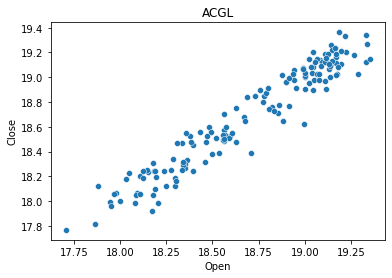

In [21]:
# print("Company Name:"+tech_list[0])
sns.scatterplot(data=lis[0][100:250], x="Open", y="Close").set(title=tech_list[0])

[Text(0.5, 1.0, 'COSM')]

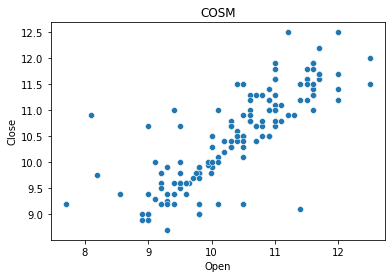

In [22]:
sns.scatterplot(data=lis[1][100:250], x="Open", y="Close").set(title=tech_list[1])

[Text(0.5, 1.0, 'IPDN')]

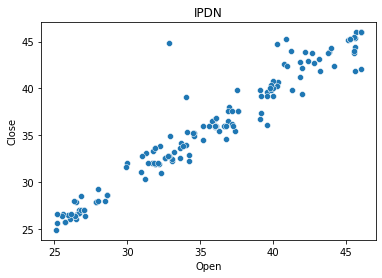

In [23]:
# print("Company Name:"+tech_list[0])
sns.scatterplot(data=lis[2][100:250], x="Open", y="Close").set(title=tech_list[2])

[Text(0.5, 1.0, 'ACGL')]

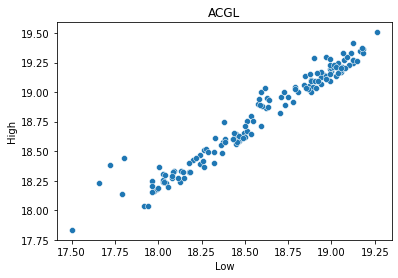

In [24]:
# print("Company Name:"+tech_list[0])
sns.scatterplot(data=lis[0][100:250], x="Low", y="High").set(title=tech_list[0])

[Text(0.5, 1.0, 'COSM')]

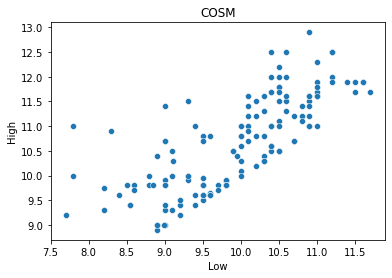

In [25]:
# print("Company Name:"+tech_list[0])
sns.scatterplot(data=lis[1][100:250], x="Low", y="High").set(title=tech_list[1])

[Text(0.5, 1.0, 'IPDN')]

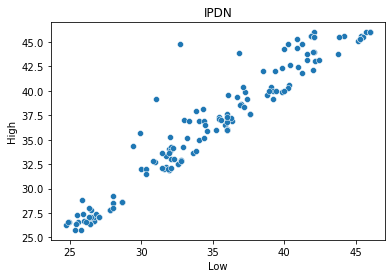

In [26]:
# print("Company Name:"+tech_list[0])
sns.scatterplot(data=lis[2][100:250], x="Low", y="High").set(title=tech_list[2])

#### Data Quality Plan

#### Missing Values

In [27]:
def calcMissingColumns(df):
    columns_name=[col for col in df.columns]
    df_missing_value_percentage=pd.DataFrame(columns=['Missing_value'], index=columns_name)

    total_count=df.shape[0]
    for col in columns_name:
        missing_percentage=(df[col].isna().sum()/total_count)*100
        df_missing_value_percentage.loc[col,'Missing_value']=missing_percentage

    return (df_missing_value_percentage)

In [28]:
print("**Missing Values for Company Name:"+tech_list[0]+"**")
calcMissingColumns(lis[0])

**Missing Values for Company Name:ACGL**


,Missing_value
Open,0.0
High,0.0
Low,0.0
Close,0.0
Adj Close,0.0
Volume,0.0
Comapny code,0.0


In [29]:
print("**Missing Values for Company Name:"+tech_list[1]+"**")
calcMissingColumns(lis[1])

**Missing Values for Company Name:COSM**


,Missing_value
Open,0.0
High,0.0
Low,0.0
Close,0.0
Adj Close,0.0
Volume,0.0
Comapny code,0.0


In [30]:
print("**Missing Values for Company Name:"+tech_list[2]+"**")
calcMissingColumns(lis[2])

**Missing Values for Company Name:IPDN**


,Missing_value
Open,0.0
High,0.0
Low,0.0
Close,0.0
Adj Close,0.0
Volume,0.0
Comapny code,0.0


#### Outliers

In [31]:
#CSCI4146_Tutorial_5_Case_Study
def detect_outliers(col):
    """Detect outliers in a dataframe column

    Args:
        col (pd.Series): A dataframe column

    Returns:
        pd.Series: Outliers
    """
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5

    return col[(col < Q1 - outlier_step) | (col > Q3 + outlier_step)]

In [32]:
print("**Outliers for Company Name:"+tech_list[0]+"**")
outliers_df_ACGL = (
    lis[0].select_dtypes("number")
    .apply(lambda col: detect_outliers(col).size)
    .rename("Num outliers")
    .to_frame()
).query("`Num outliers` > -1")

outliers_df_ACGL["Percent outliers"] = outliers_df_ACGL["Num outliers"] / len(lis[0]) * 100
outliers_df_ACGL.sort_values(by="Percent outliers", ascending=False)

**Outliers for Company Name:ACGL**


,Num outliers,Percent outliers
Volume,104,5.902384
Open,19,1.078320
High,18,1.021566
Close,18,1.021566
Adj Close,18,1.021566
Low,17,0.964813


In [33]:
print("**Outliers for Company Name:"+tech_list[1]+"**")
outliers_df_COSM1 = (
    lis[1].select_dtypes("number")
    .apply(lambda col: detect_outliers(col).size)
    .rename("Num outliers")
    .to_frame()
).query("`Num outliers` > -1")

outliers_df_COSM1["Percent outliers"] = outliers_df_COSM1["Num outliers"] / len(lis[1]) * 100
outliers_df_COSM1.sort_values(by="Percent outliers", ascending=False)

**Outliers for Company Name:COSM**


,Num outliers,Percent outliers
Volume,175,9.931896
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Close,0,0.000000
Adj Close,0,0.000000


In [203]:
print("**Outliers for Company Name:"+tech_list[2]+"**")
outliers_df_IPDN = (
    lis[2].select_dtypes("number")
    .apply(lambda col: detect_outliers(col).size)
    .rename("Num outliers")
    .to_frame()
).query("`Num outliers` > -1")

outliers_df_IPDN["Percent outliers"] = outliers_df_IPDN["Num outliers"] / len(lis[2]) * 100
outliers_df_IPDN.sort_values(by="Percent outliers", ascending=False)

**Outliers for Company Name:IPDN**


,Num outliers,Percent outliers
Volume,45,9.89011
Open,0,0.00000
High,0,0.00000
Low,0,0.00000
Close,0,0.00000
Adj Close,0,0.00000


Data Quality Issue report 

In [36]:
# tech_list
data_quality_plan_df = []
for i in range(len(tech_list)):
    tempFrame = pd.DataFrame(index=lis[i].columns, columns=["Observations", "Actions"], dtype="string")
    data_quality_plan_df.append(tempFrame)
    

In [37]:
for i in range(len(data_quality_plan_df)):
    for j in data_quality_plan_df[i].columns:
        for k in lis[i].columns:
            if j == 'Observations':
                     data_quality_plan_df[i][j][k] = "No missing values and low outliers"
            else:
                     data_quality_plan_df[i][j][k] = "Not modifying the cells"

In [38]:
print("**Company Name:"+tech_list[0]+"**")
data_quality_plan_df[0]

**Company Name:ACGL**


,Observations,Actions
Open,No missing values and low outliers,Not modifying the cells
High,No missing values and low outliers,Not modifying the cells
Low,No missing values and low outliers,Not modifying the cells
Close,No missing values and low outliers,Not modifying the cells
Adj Close,No missing values and low outliers,Not modifying the cells
Volume,No missing values and low outliers,Not modifying the cells
Comapny code,No missing values and low outliers,Not modifying the cells


In [39]:
print("**Company Name:"+tech_list[1]+"**")
data_quality_plan_df[1]

**Company Name:COSM**


,Observations,Actions
Open,No missing values and low outliers,Not modifying the cells
High,No missing values and low outliers,Not modifying the cells
Low,No missing values and low outliers,Not modifying the cells
Close,No missing values and low outliers,Not modifying the cells
Adj Close,No missing values and low outliers,Not modifying the cells
Volume,No missing values and low outliers,Not modifying the cells
Comapny code,No missing values and low outliers,Not modifying the cells


In [40]:
print("**Company Name:"+tech_list[2]+"**")
data_quality_plan_df[2]

**Company Name:IPDN**


,Observations,Actions
Open,No missing values and low outliers,Not modifying the cells
High,No missing values and low outliers,Not modifying the cells
Low,No missing values and low outliers,Not modifying the cells
Close,No missing values and low outliers,Not modifying the cells
Adj Close,No missing values and low outliers,Not modifying the cells
Volume,No missing values and low outliers,Not modifying the cells
Comapny code,No missing values and low outliers,Not modifying the cells


### Data Preparation

The data is being fetched from Yahoo Finance API, and since there are no quality issues as discussed in previous section, we are not modifying the dataset.

# Modeling

For our modeling purpose we have selected a base model that will act as a reference in our modelling. The base model selected is Decision Tree Regressor, which is generally a strong learner. 
<br>
 * Decision Tree Regressor (Strong learner)

Since our project is trying to predict intraday trading, we will need higher accuracy. For this purpose, we have selected three candidate models.
<br>
* Baggingregressor
* GradientBoostingregressor
* Random forest Regressor

### Baseline modeling

Why we are using tree regressor as our baseline model and strong learner:-
1. decision trees handle outliers without any need to transform the data.

2. decision trees are easy to interpret, which means that the structure of the model can give some insight into customer behavior.

In [34]:
modelliscategory=[]
def basicModelMaker():
    modeltrainlisname=['treeregressor','baggingregressor','GradientBoostingregressor','Random forest Regressor']
    modeltrainlis=[tree.DecisionTreeRegressor(),BaggingRegressor(),GradientBoostingRegressor(),RandomForestRegressor()]

    
    for m in range(len(modeltrainlis)):
        modellis=[]
        for i in lis:
            X=i[descriptive_variables[:-1]]
            Y=i[target_variable]
            X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
            model = modeltrainlis[m]
            n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', n_jobs=-1,cv=5, error_score='raise')
            # report performance
            model.fit(X_train,y_train)
            #save model for future use
            pickle.dump(model,open(""+modeltrainlisname[m]+i['Comapny code'][0]+".sav", 'wb'))
            modellis.append(model)
            print('The Score of the model'+modeltrainlisname[m]+'for'+i['Comapny code'][0]+' is %f'%model.score(X_test,y_test))
            print('mse and STD for all mse: %f %f' % (-1*mean(n_scores), std(n_scores)))
        modelliscategory.append(modellis)

In [35]:
#this method will fit our models and calculated score of the respective models
basicModelMaker()

The Score of the modeltreeregressorforACGL is 0.997497
mse and STD for all mse: 0.103947 0.037924
The Score of the modeltreeregressorforCOSM is 0.988343
mse and STD for all mse: 0.084328 0.014557
The Score of the modeltreeregressorforIPDN is 0.998056
mse and STD for all mse: 0.434562 0.056724
The Score of the modelbaggingregressorforACGL is 0.998595
mse and STD for all mse: 0.073655 0.034020
The Score of the modelbaggingregressorforCOSM is 0.991695
mse and STD for all mse: 0.062482 0.010501
The Score of the modelbaggingregressorforIPDN is 0.999072
mse and STD for all mse: 0.257879 0.080421
The Score of the modelGradientBoostingregressorforACGL is 0.998665
mse and STD for all mse: 0.069334 0.021848
The Score of the modelGradientBoostingregressorforCOSM is 0.992173
mse and STD for all mse: 0.052401 0.004147
The Score of the modelGradientBoostingregressorforIPDN is 0.999021
mse and STD for all mse: 0.227870 0.058885
The Score of the modelRandom forest RegressorforACGL is 0.998775
mse and 

we  are getting the better score for bagginng and random forest regressor.hence we are going forward with bagging regresor  and random forest regressor   

### Learning curve with baseline model

In [36]:
def plot_learning_curve(estimator,X_train,y_train,company):
    train_sizes = [5,10, 500, 985]
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator =estimator, X = X_train, y = y_train, train_sizes = train_sizes , cv = 5, scoring = 'neg_mean_squared_error')
    train_scores_mean =-1* train_scores.mean(axis = 1)
    validation_scores_mean = -1*validation_scores.mean(axis = 1)
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for '+company, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(-1,1)
    plt.show()

ACGL


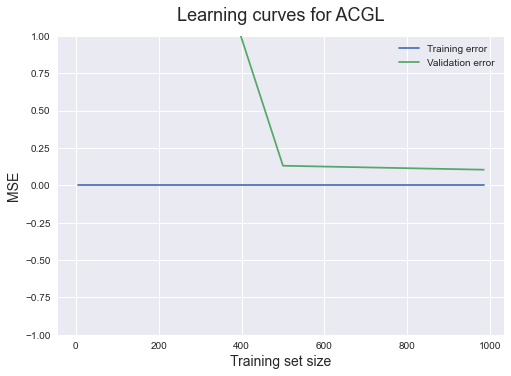

COSM


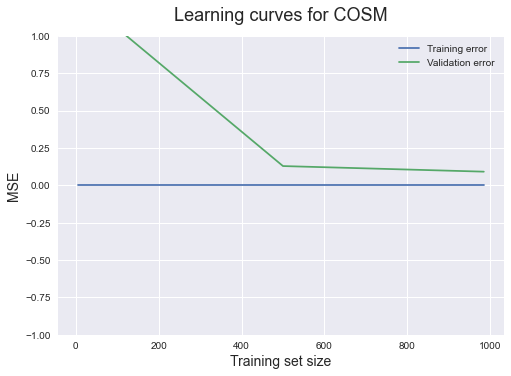

IPDN


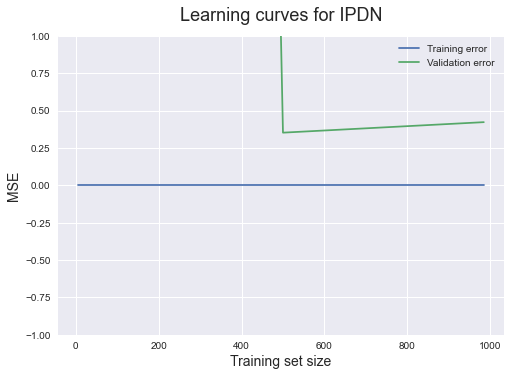

In [37]:
for i in lis:
    X=i[descriptive_variables[:-1]]
    Y=i[target_variable]
    X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
    print(i['Comapny code'][0])
    plot_learning_curve(tree.DecisionTreeRegressor(),X_train,y_train,i['Comapny code'][0])

## Hyperparameter tuning of the model

### Plot validation curve to select hyperparameter

In [43]:
def plot_validation_curve(
    estimator,
    title,
    X,
    y,
    param_name,
    param_range,
    cv=None,
    n_jobs=None,
    axes=None,
):
    train_scores, test_scores = validation_curve(
        estimator,
        X,
        y,
        param_name=param_name,
        param_range=param_range,
        scoring='neg_mean_squared_error',
        n_jobs=n_jobs,
        cv=cv,
    )
    train_scores_mean =-1* np.mean(train_scores, axis=1)
    train_scores_std = -1*np.std(train_scores, axis=1)
    test_scores_mean = -1*np.mean(test_scores, axis=1)
    test_scores_std = -1*np.std(test_scores, axis=1)

    if axes == None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    axes.set_xlabel(param_name)
    axes.set_ylabel("Score")

    lw = 2
    axes.plot(
        param_range,
        train_scores_mean,
        label="Training score",
        color="darkorange",
        lw=lw,
    )
    axes.fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="darkorange",
        lw=lw,
    )
    axes.plot(
        param_range,
        test_scores_mean,
        label="Cross-validation score",
        color="navy",
        lw=lw,
    )
    axes.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="navy",
        lw=lw,
    )
    axes.legend(loc="best")
    return plt


For Bagging Regressor

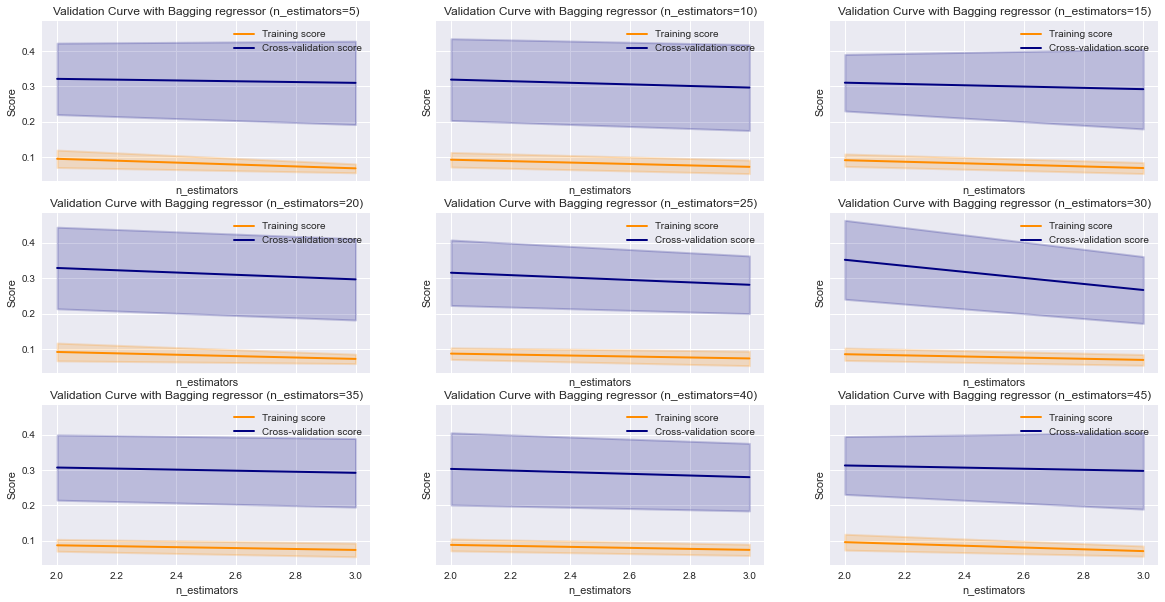

<Figure size 576x396 with 0 Axes>

In [44]:
n_jobs = -1
cv = ShuffleSplit(n_splits=25, test_size=0.2, random_state=0)
fig, axes = plt.subplots(3, 3, figsize=(20, 10), sharex=True, sharey=True)

for ax, estimatornum in zip(axes.flatten(), [5,10,15,20,25,30,35,40,45]):
    estimator = BaggingRegressor(n_estimators=estimatornum)
    title = f"Validation Curve with Bagging regressor (n_estimators={estimatornum})"
    plot_validation_curve(
        estimator,
        title,
        X_train,
        y_train,
        param_name="n_estimators",
        param_range=np.arange(2, X.shape[-1], 1),
        cv=cv,
        n_jobs=n_jobs,
        axes=ax,
    )

plt.show();
plt.tight_layout();

For Random Forest Regressor

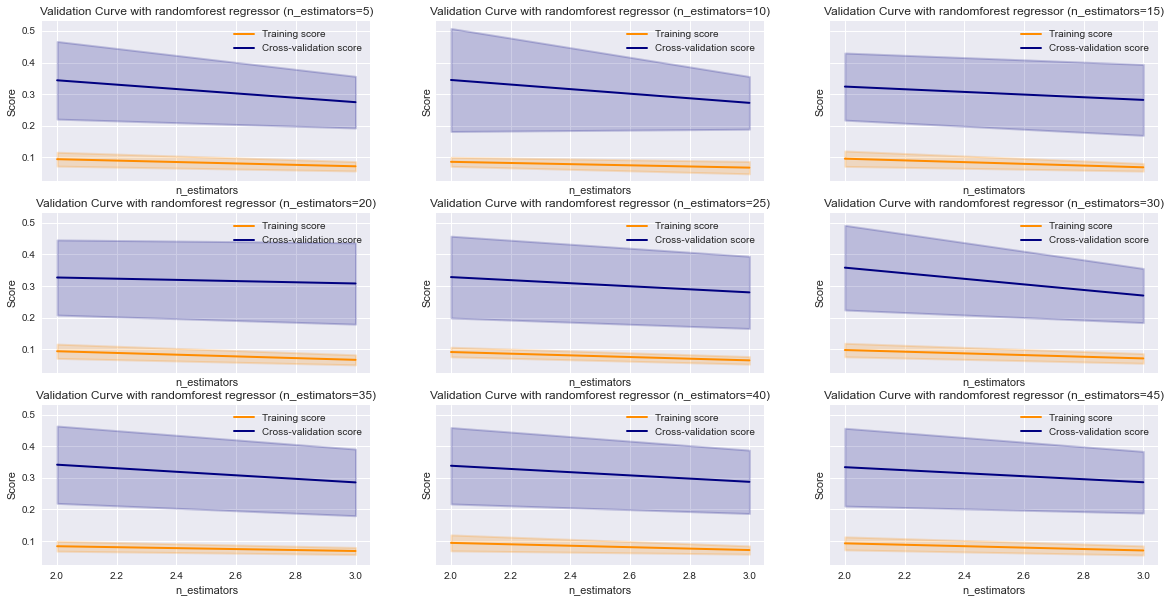

<Figure size 576x396 with 0 Axes>

In [45]:
n_jobs = -1
cv = ShuffleSplit(n_splits=25, test_size=0.2, random_state=0)
fig, axes = plt.subplots(3, 3, figsize=(20, 10), sharex=True, sharey=True)

for ax, estimatornum in zip(axes.flatten(), [5,10,15,20,25,30,35,40,45]):
    estimator = RandomForestRegressor(n_estimators=estimatornum)
    title = f"Validation Curve with randomforest regressor (n_estimators={estimatornum})"
    plot_validation_curve(
        estimator,
        title,
        X_train,
        y_train,
        param_name="n_estimators",
        param_range=np.arange(2, X.shape[-1], 1),
        cv=cv,
        n_jobs=n_jobs,
        axes=ax,
    )

plt.show();
plt.tight_layout();

After plotting the validation curve for different n_estimators values, 5, 10, 15 and up to 45,. Since the evaluation criteria chosen should converge towards zero, meaning that the error is decreasing. This trend can be seen for n_estimators = 15.

We also have Random Forest Regressor as another candidate model, so we plotted the validation curve for various n_estimators values, 10,15 and up to 6

**Calculating Score of models after Hyperparmeter tunning** 

In [49]:
modelliscategoryTuned=[]
def basicModelMakerTuning():
    modeltrainlisname=['baggingregressor','Random forest Regressor']
#     modeltrainlis=[BaggingRegressor(),RandomForestRegressor()]

    
    for m in range(len(modeltrainlisname)):
        modellis=[]
        for i in lis:
            X=i[descriptive_variables[:-1]]
            Y=i[target_variable]
            X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
            if(modeltrainlisname[m]=='baggingregressor'):
                model =BaggingRegressor(n_estimators=15)
            else:
                model=RandomForestRegressor(n_estimators=30)
            n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', n_jobs=-1,cv=5, error_score='raise')
            # report performance
            model.fit(X_train,y_train)
            #save model for future use
            pickle.dump(model,open(""+modeltrainlisname[m]+i['Comapny code'][0]+".sav", 'wb'))
            modellis.append(model)
            print('The Score of the model'+modeltrainlisname[m]+'for'+i['Comapny code'][0]+' is %f'%model.score(X_test,y_test))
            print('mse and STD for all mse: %f %f' % (-1*mean(n_scores), std(n_scores)))
        modelliscategoryTuned.append(modellis)

In [214]:
#after hyperparameter tuning 
#keep n=15 for baggining
#keep n=30 for randomForest
basicModelMakerTuning()

The Score of the modelbaggingregressorforACGL is 0.998774
mse and STD for all mse: 0.072517 0.033310
The Score of the modelbaggingregressorforCOSM is 0.992381
mse and STD for all mse: 0.057392 0.007437
The Score of the modelbaggingregressorforIPDN is 0.999068
mse and STD for all mse: 0.217068 0.053451
The Score of the modelRandom forest RegressorforACGL is  0.9787931352283744
mse and STD for all mse: 0.072505 0.038898
The Score of the modelRandom forest RegressorforCOSM is  0.9826336303267044
mse and STD for all mse: 0.057921 0.008084
The Score of the modelRandom forest RegressorforIPDN is  0.9890968146595011
mse and STD for all mse: 0.231027 0.059630


After setting the hyperparameters:
* **Bagging Regressor:** n_estimators = 15
* **Random Forest Regressor:** n_estimators = 30   
<br>
The error has reduced. 

# Evaluation

### Actual and Predicted Graphs for Bagging Regressor

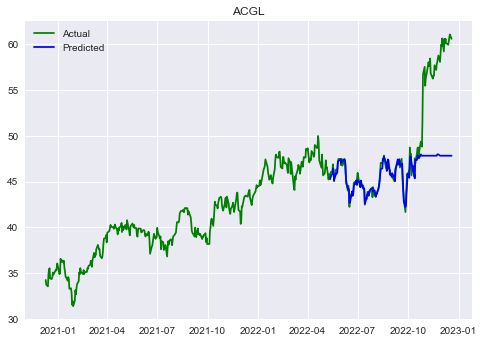

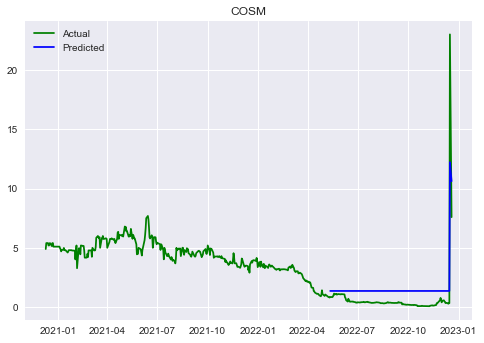

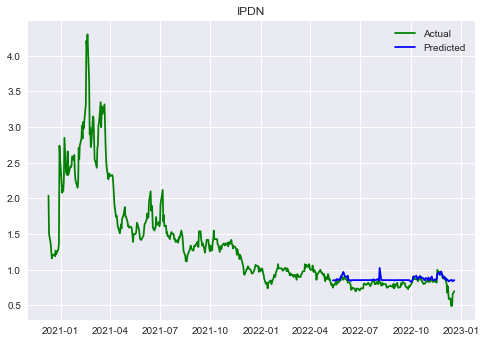

In [51]:
#for BaggingRegressor
for i in range(len(testlis)):
    predictions=modelliscategoryTuned[0][i].predict(testlis[i][descriptive_variables[:-1]][math.ceil(len(testlis[i][descriptive_variables[:-1]])*0.7):])
    predictions=pd.Series(predictions,index=testlis[i][descriptive_variables[:-1]][math.ceil(len(testlis[i][descriptive_variables[:-1]])*0.7):].index)
    plt.plot(testlis[i]['Close'],'g-',label = 'Actual')
    plt.plot(predictions,'b-',label = 'Predicted')
    plt.title(testlis[i]['Comapny code'][0])
    plt.legend()
    plt.show()

### Actual and Predicted Graphs for Random Forest Regressor

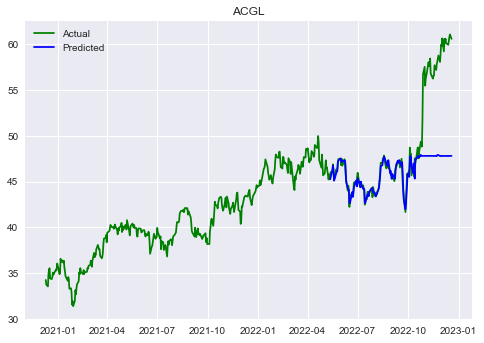

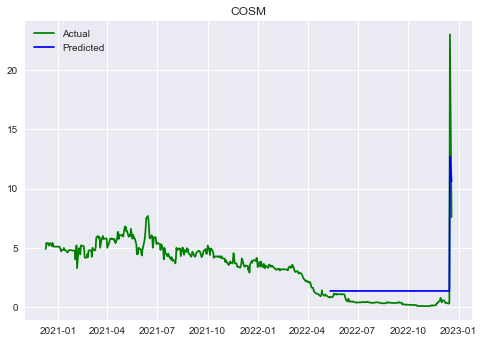

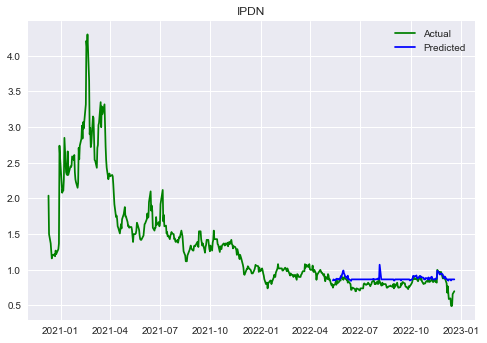

In [52]:
#for RandomForest()
for i in range(len(testlis)):
    predictions=modelliscategoryTuned[1][i].predict(testlis[i][descriptive_variables[:-1]][math.ceil(len(testlis[i][descriptive_variables[:-1]])*0.7):])
    predictions=pd.Series(predictions,index=testlis[i][descriptive_variables[:-1]][math.ceil(len(testlis[i][descriptive_variables[:-1]])*0.7):].index)
    plt.plot(testlis[i]['Close'],'g-',label = 'Actual')
    plt.plot(predictions,'b-',label = 'Predicted')
    plt.title(testlis[i]['Comapny code'][0])
    plt.legend()
    plt.show()

We fetched data for another two years. These datapoints are not seen by the model, hence we predicted the values for that date range, and plotted graph with the actual values.

### Learning curve with bagging regressor candidate model

ACGL


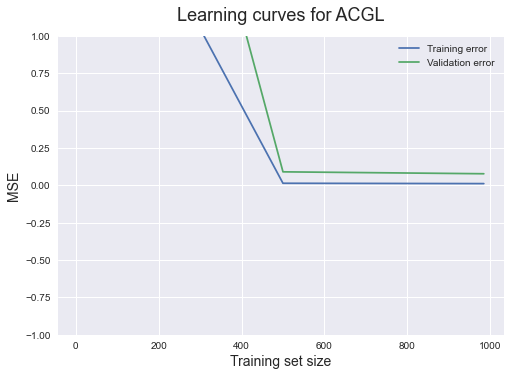

COSM


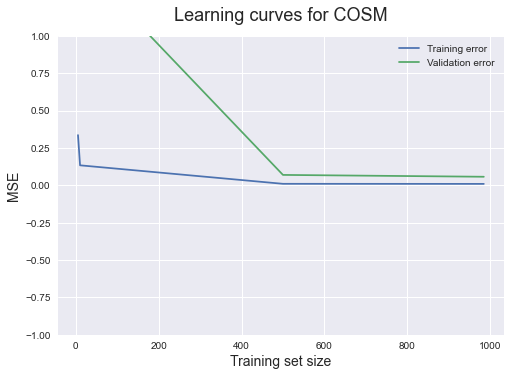

IPDN


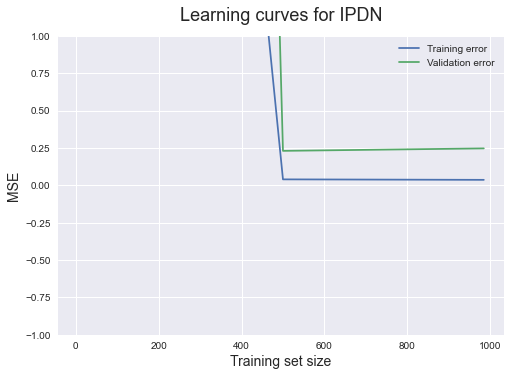

In [54]:
ctr=0
for i in lis:
    X=i[descriptive_variables[:-1]]
    Y=i[target_variable]
    X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
    print(i['Comapny code'][0])
    plot_learning_curve(modelliscategoryTuned[0][ctr],X_train,y_train,i['Comapny code'][0])
    ctr+=1



### Learning curve with randomforest as candidate model

ACGL


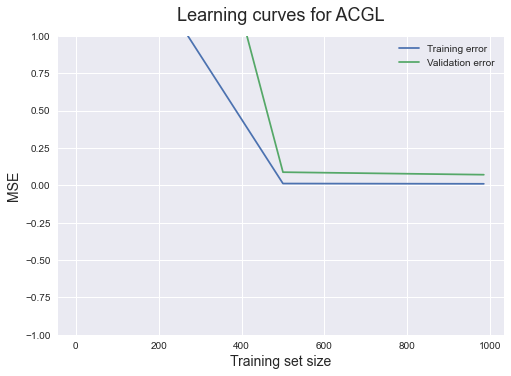

COSM


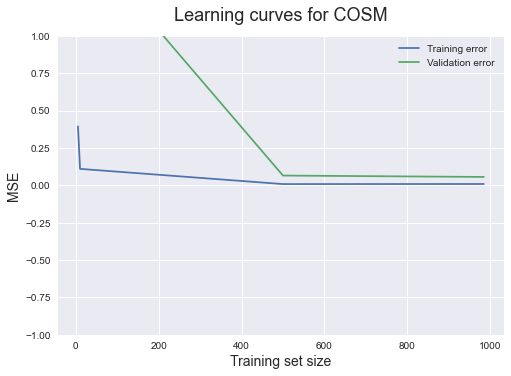

IPDN


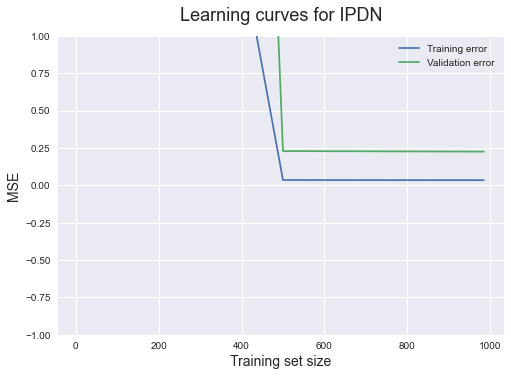

In [55]:
ctr1=0
for i in lis:
    X=i[descriptive_variables[:-1]]
    Y=i[target_variable]
    X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
    print(i['Comapny code'][0])
    plot_learning_curve(modelliscategoryTuned[1][ctr1],X_train,y_train,i['Comapny code'][0])
    ctr1+=1

We have plotted the learning curve of Bagging regressor and random forest regressor. As seen in figure, Initially the validation error is high but with increase in the number of trainings sets the validation error starts decreasing and the training error also shows a little downward trend with an increase in the number of training sets. These two error curves stabilize around 400 training sets, and the gap between the two error curves becomes relatively minimal

by understanding the relationship between training error and validation error and by monitoring the shape of the learning curve, we have concluded that our model is well-fitted because the typical feature of a good fit model's learning curve is that the gap between the training error and validation error gets minimal as the training size increases

### Variance and bias

For BaggingRegressor()

In [56]:
#https://thecleverprogrammer.com/2021/05/20/bias-and-variance-using-python/
# https://medium.com/analytics-vidhya/calculation-of-bias-variance-in-python-8f96463c8942
from sklearn import metrics
ctr=0
for i in lis:
    X=i[descriptive_variables[:-1]]
    Y=i[target_variable]
    X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
    estimator=modelliscategoryTuned[0][ctr]
    estimator.fit(X_train,y_train)
    y_pred = estimator.predict(X_test)
    er = []
    ctr+=1
    mse, bias, variance = bias_variance_decomp(estimator, X_train.values, y_train.values, X_test.values, y_test.values, 
                                           loss='mse', num_rounds=200, random_seed=123)
    print("Average Bias for "+i['Comapny code'][0]+":", bias)
    print("Average Variance for "+i['Comapny code'][0]+" :", variance)
   

Average Bias for ACGL: 528.5822306238185
Average Variance for ACGL : 0.08147448015122874
Average Bias for COSM: 521.9716446124763
Average Variance for COSM : 0.06040642722117202
Average Bias for IPDN: 527.1852551984878
Average Variance for IPDN : 0.10192816635160681


For RandomForest()

In [57]:
## Variance and bias
# https://www.bmc.com/blogs/bias-variance-machine-learning/
ctr=0
for i in lis:
    X=i[descriptive_variables[:-1]]
    Y=i[target_variable]
    X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
    estimator=modelliscategoryTuned[1][0]
    estimator.fit(X_train,y_train)
#     print(f'nLasso Coefficients: {estimator.coef_}')
    preds = estimator.predict(X_test)
    er = []
    ctr+=1
    y_pred = estimator.predict(X_test)
    er = []
    ctr+=1
    mse, bias, variance = bias_variance_decomp(estimator, X_train.values, y_train.values, X_test.values, y_test.values, 
                                           loss='mse', num_rounds=200, random_seed=123)
    print("Average Bias for "+i['Comapny code'][0]+":", bias)
    print("Average Variance for "+i['Comapny code'][0]+" :", variance)
 

Average Bias for ACGL: 528.5841209829867
Average Variance for ACGL : 0.07720226843100189
Average Bias for COSM: 521.9338374291116
Average Variance for COSM : 0.057145557655954624
Average Bias for IPDN: 527.1474480151229
Average Variance for IPDN : 0.09472589792060493


For both the models, Bagging and Random Forest, the bias is identical. The variance for Random Forest is lower, and this supports the results from the score calculated as well. 

### Analyze the running time for inference and training of model

In [58]:
# CSCI4146: Tutorial 5: Case Study: Customer Churn
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        scoring="neg_mean_squared_error",
    )
    train_scores_mean = -1*np.mean(train_scores, axis=1)
    train_scores_std = -1*np.std(train_scores, axis=1)
    test_scores_mean = -1*np.mean(test_scores, axis=1)
    test_scores_std = -1*np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training Error"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="validation Error"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    return plt

For BaggingRegressor

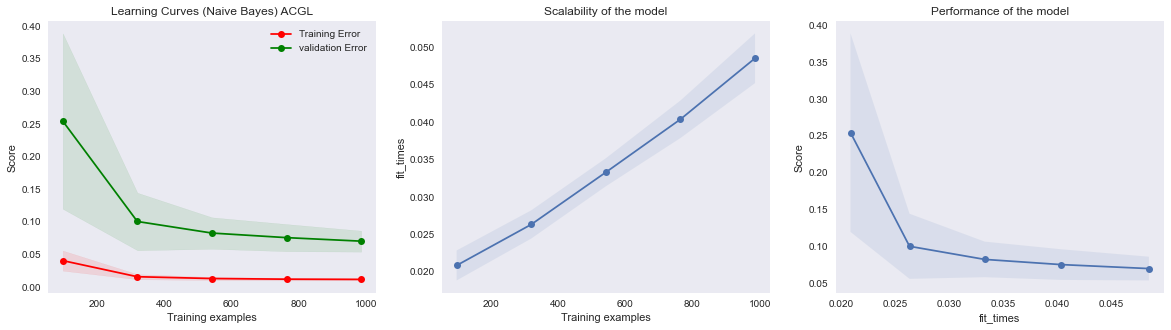

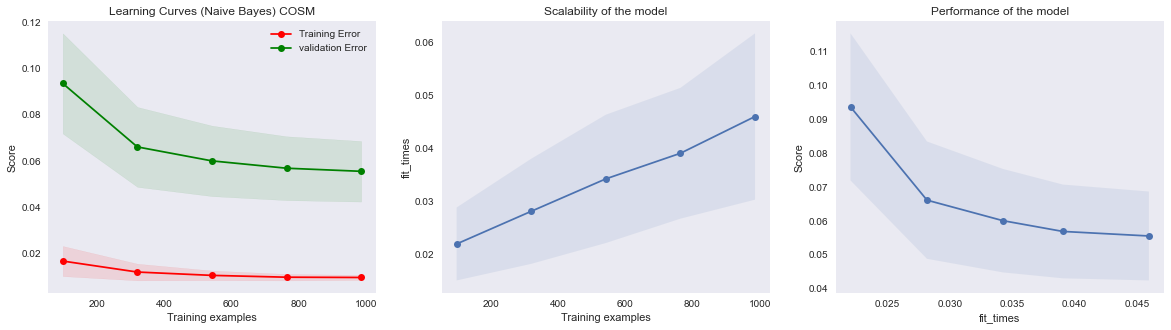

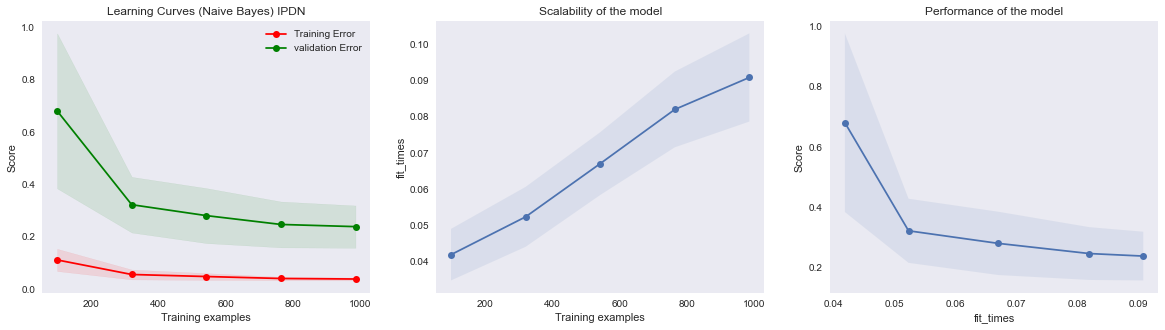

In [59]:
ctr = 0
for i in lis:
    X=i[descriptive_variables[:-1]]
    Y=i[target_variable]
    X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
    estimator=modelliscategoryTuned[0][ctr]
    ctr += 1
    title = "Learning Curves (Naive Bayes) "+i['Comapny code'][0]
    n_jobs = 4
    train_sizes = np.linspace(0.1, 1.0, 10)
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=4)
    plt.show()

For Random Forest Regressor

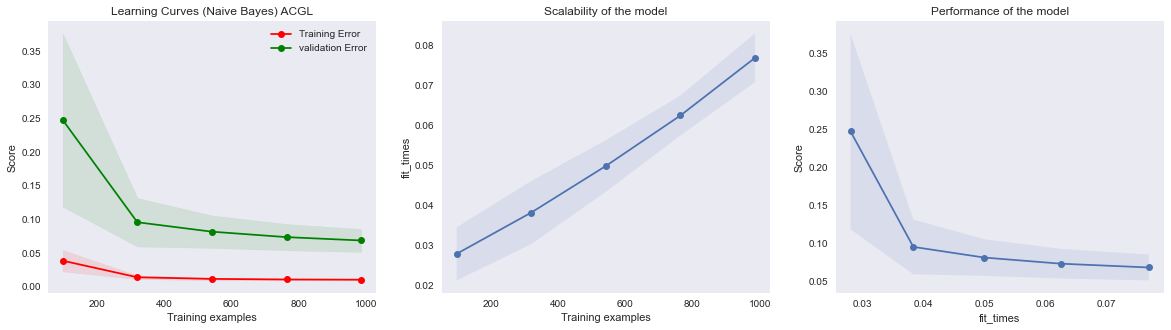

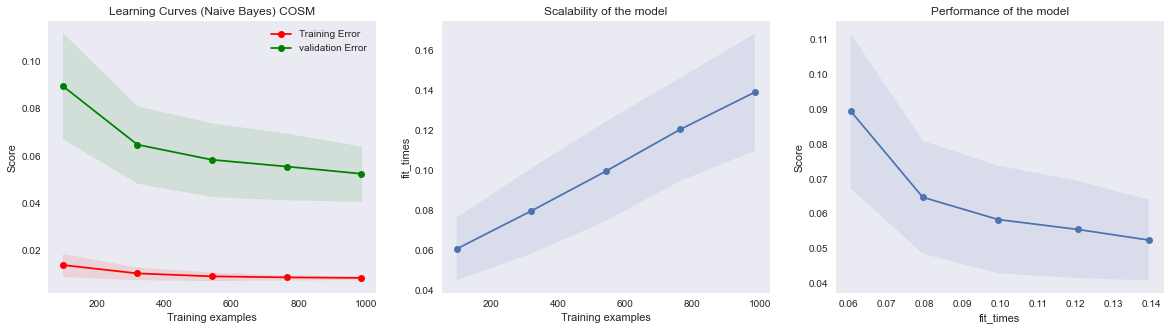

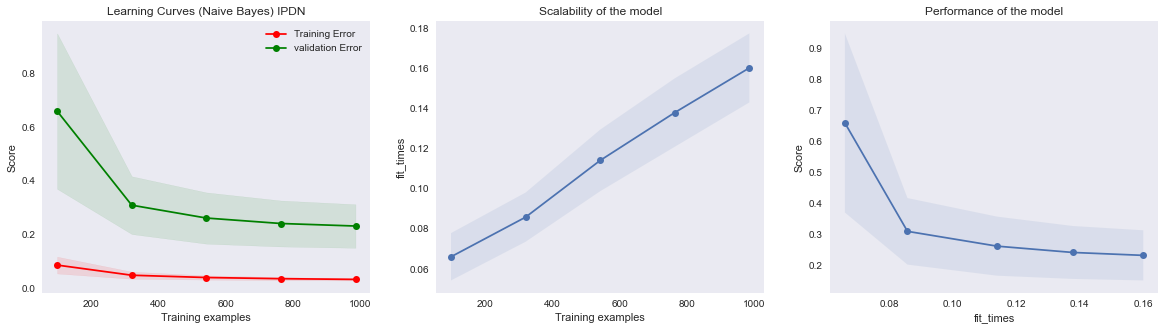

In [130]:
ctr1 = 0
for i in lis:
    X=i[descriptive_variables[:-1]]
    Y=i[target_variable]
    X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
    estimator=modelliscategoryTuned[1][ctr1]
    ctr += 1
    title = "Learning Curves (Naive Bayes) "+i['Comapny code'][0]
    n_jobs = 4
    train_sizes = np.linspace(0.1, 1.0, 10)
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=4)
    plt.show()

The scalability graph shows the time it takes to fit the model with respect to the training dataset size. Our model is increasing in a linear manner, hence it shows that our model is scaling as we increase the data for training.

Our evaluation metric for the model is the negative root mean square, referred to as a score. Since this is the error rate, it should decrease over the training set. This can be seen in figures 19, 20, and 21 that the score is gradually decreasing with respect to the training set. Our model’s performance is inversely proportional to the score; hence this implies that the performance is increasing as we trained it


# Conclusion

The existing solutions available mainly focus on long-term investing of stocks, but the options for intraday trading are very less. Our project aims at predicting the closing price of a stock based on the opening price, current known high price, current known low price, and volume of the stock. The outcome can help newcomers and experienced traders in decision-making for buying or selling the stock. 
We initially selected a strong learner, decision tree regressor, and three candidate models. Our evaluation metric was mean squared error. After training the models on data for over seven years, we evaluated each model. Our results indicated that Bagging Regressor and Random Forest had the best results out of the other models. This can be because, both these models are ensemble methods. As these methods make better predictions because they combine various learners. These models are even used in many online data science competitions [1].

To further improvise the models, we performed hyperparameter tuning. The final results showed that Random Forest Regressor performed better than the Bagging Regressor. This can be due to the fact that the trees are more independent of each other as opposed to the bagging. It results in better performance because it better handles the variance-bias trade-off [2].

Hence, we conclude that Random Forest Regressor is best suited for this problem statement. For the current dataset, the accuracy is high. It can be because of the smaller dataset. Although we selected data for seven years, the stocks opening and closing change only once a day. Hence, the overall size of the stock market dataset is generally low. As the data will increase, the model will be able to better predict various trends for the stock.

### Reference

[1] “Ensemble Methods: Elegant Techniques to Produce Improved Machine Learning Results,” Toptal Engineering Blog.  [Online]. Available: https://www.toptal.com/machine-learning/ensemble-methods-machine-learning. [Accessed: Dec. 16, 2022] 
<br><br>  
[2] S. Raschka, “How does the random forest model work? How is it different from bagging and boosting in ensemble models?,” Sebastian Raschka, PhD, Dec. 19, 2022.  [Online]. Available: https://sebastianraschka.com/faq/docs/bagging-boosting-rf.html. [Accessed: Dec. 19, 2022]        
<br><br> 
[3] “https://dal.brightspace.com/d2l/le/content/232269/viewContent/3282145/View,” CSCI4146_Tutorial_5_Case_Study.  [Online]. Available: https://dal.brightspace.com/d2l/le/content/232269/viewContent/3282145/View. [Accessed: Dec. 07, 2022] <br><br> 
[4] “https://dal.brightspace.com/d2l/le/content/232269/viewContent/3338367/View,” CSCI4146_Tutorial_9_Model_Evaluation.  [Online]. Available: https://dal.brightspace.com/d2l/le/content/232269/viewContent/3338367/View. [Accessed: Dec. 05, 2022]
<br><br>
[5] A. Kharwal, “Bias and Variance using Python | Aman Kharwal,” thecleverprogrammer, May 20, 2021.  [Online]. Available: https://thecleverprogrammer.com/2021/05/20/bias-and-variance-using-python/. [Accessed: Dec. 14, 2022]
<br><br>
[6] Nallaperumal, “Calculation of Bias & Variance in python,” Medium, Apr. 11, 2021.  [Online]. Available: https://medium.com/analytics-vidhya/calculation-of-bias-variance-in-python-8f96463c8942. [Accessed: Dec. 17, 2022]
<br><br>
[7] “Bias & Variance in Machine Learning: Concepts & Tutorials,” BMC Blogs, Jul. 16, 2021.  [Online]. Available: https://www.bmc.com/blogs/bias-variance-machine-learning/. [Accessed: Dec. 17, 2022]
<br><br>
[8]“yfinance,” PyPI, Dec. 17, 2022.  [Online]. Available: https://pypi.org/project/yfinance/. [Accessed: Dec. 17, 2022]
<br><br>
[9] “sklearn.tree.DecisionTreeRegressor,” scikit-learn.  [Online]. Available: https://scikit-learn/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html. [Accessed: Dec. 16, 2022]
<br><br>
[10] “1.10. Decision Trees,” scikit-learn.  [Online]. Available: https://scikit-learn/stable/modules/tree.html. [Accessed: Dec. 16, 2022]
<br><br>
[11] “1.11. Ensemble methods,” scikit-learn.  [Online]. Available: https://scikit-learn/stable/modules/ensemble.html. [Accessed: Dec. 17, 2022]
<br><br>
[12] “sklearn.ensemble.BaggingClassifier,” scikit-learn.  [Online]. Available: https://scikit-learn/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html. [Accessed: Dec. 17, 2022]